#classify the radio signals from outer space into one of four classes.

##Retrieve the signals data

###SETI Data Set
Training Data:
  - train_images: Normalized values of Pixels
  - train_labels: Stored as One-Hot Encoded data

Validation Data:
  - val_images: Normalized values of Pixels
  - val_labels: Stored as One-Hot Encoded data

Classes: 0=“squiggle”, 1=“narrowband”, 2=“narrowbanddrd”, and 3=“noise”

In [2]:
!wget https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0 -O dataset.zip

--2023-10-01 09:13:15--  https://www.dropbox.com/sh/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma [following]
--2023-10-01 09:13:15--  https://www.dropbox.com/sh/raw/pwbc7gvqqmn9fzk/AAAL2Tpy1Bx151AtjnbCIedma
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c8eb10fea4f9888d0e334b38e.dl.dropboxusercontent.com/zip_download_get/BoJ8-dm3xvMaPaL2hrIP0C-mmxNRsevS9mhDky_noMArvi-wAm3uhrbWxNthr0U3mVmfUMgHq8RxezJ5UWzAnKWU7wWdgQQRmYWsIvtN3ovxHw# [following]
--2023-10-01 09:13:15--  https://uc3c8eb10fea4f9888d0e334b38e.dl.dropboxusercontent.com/zip_download_get/BoJ8-dm3xvMaPaL2hrIP0C-mmxNRsevS9mhDky_noMArvi-wAm3uhrbWxNthr0U3mVmfUMgHq8RxezJ5UWzAnKWU7wWd

In [3]:
!unzip dataset.zip
! mv /content/valid/images\ \(1\).csv /content/valid/images.csv
! mv /content/valid/labels\ \(1\).csv /content/valid/labels.csv
!rm dataset.zip

Archive:  dataset.zip
mapname:  conversion of  failed
   creating: valid/
   creating: train/
 extracting: train/images.csv        
 extracting: train/labels.csv        
 extracting: valid/labels (1).csv    
 extracting: valid/images (1).csv    


##Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print ("tensorflow version: ", tf.__version__)


tensorflow version:  2.13.0


##Read data & visualize

In [5]:
train_df = pd.read_csv('train/images.csv',header=None)
train_labels_df=pd.read_csv('train/labels.csv',header=None)
validate_df=pd.read_csv('valid/images.csv', header=None)
validate_labels_df=pd.read_csv('valid/labels.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [6]:
train_labels_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [7]:
print("training data shape:",train_df.shape)
print("validation data shape:",validate_df.shape)
print("training labels shape:", train_labels_df.shape)
print("validation labels shape:", validate_labels_df.shape)


training data shape: (3200, 8192)
validation data shape: (800, 8192)
training labels shape: (3200, 4)
validation labels shape: (800, 4)


Reshape the training data as the neural network can’t take in a Data Frame format. 8192 is 64*128 image

In [8]:
x_train=train_df.values.reshape(3200,64,128,1)
x_valid=validate_df.values.reshape(800,64,128,1)

y_train=train_labels_df.values
y_valid=validate_labels_df.values



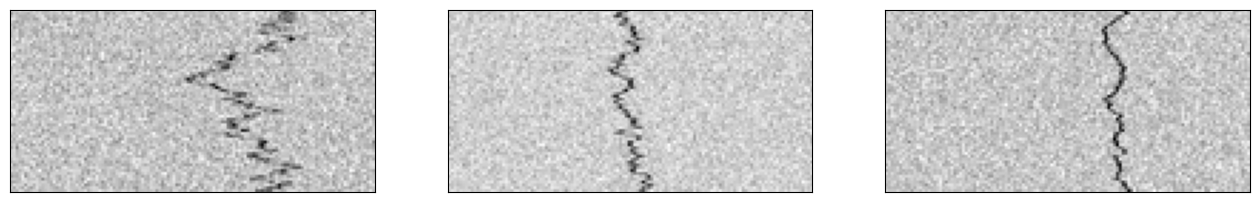

In [9]:
plt.figure(0,figsize=(16,16))
for i in range(1,4):
  plt.subplot(1,3,i)
  plt.xticks([])
  plt.yticks([])
  img=x_train[np.random.randint(0,x_train.shape[1])]
  plt.imshow(img, cmap='gray')


##Using Image Generator to transform some of the images randomly during training process with a horizontal flip

In [10]:
datagen_train=ImageDataGenerator (horizontal_flip=True)
datagen_valid=ImageDataGenerator(horizontal_flip=True)
datagen_valid.fit(x_valid)

##CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten, Activation
from tensorflow.keras.optimizers import Adam


In [12]:
model=Sequential()
#1st Convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape=(64,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

#2nd convolution
model.add(Conv2D(64,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))
#Output
model.add(Dense(4,activation='softmax'))

initial_learning_rate=0.005
lr_schedule= tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=initial_learning_rate,decay_steps=5,
                                                            decay_rate=0.96,staircase=True)
optimizer=Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 128, 32)       832       
                                                                 
 batch_normalization (Batch  (None, 64, 128, 32)       128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 64, 64)        5

###Callbacks and training the model

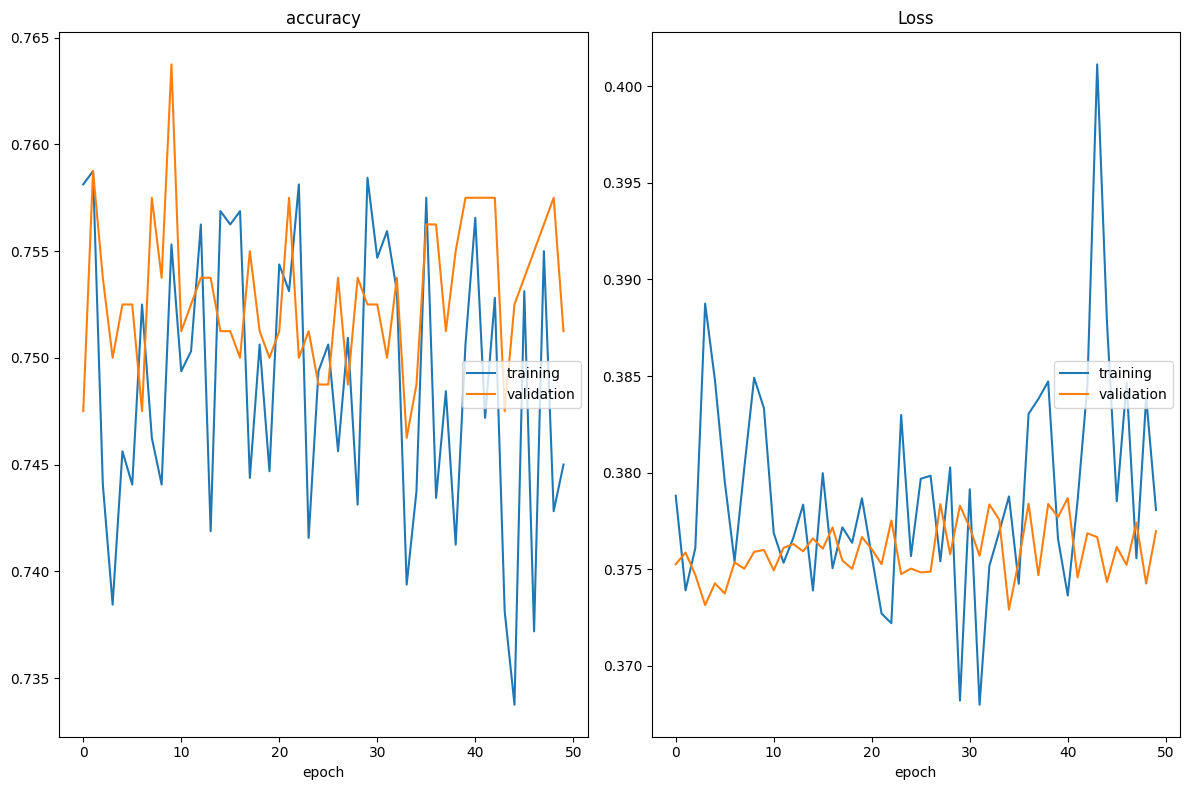

accuracy
	training         	 (min:    0.734, max:    0.759, cur:    0.745)
	validation       	 (min:    0.746, max:    0.764, cur:    0.751)
Loss
	training         	 (min:    0.368, max:    0.401, cur:    0.378)
	validation       	 (min:    0.373, max:    0.379, cur:    0.377)
100/100 [==============================] - 5s 45ms/step - loss: 0.3781 - accuracy: 0.7450 - val_loss: 0.3770 - val_accuracy: 0.7513


In [20]:
!pip install livelossplot
from keras.callbacks import EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback
from tensorflow.keras.callbacks import ModelCheckpoint

# Creating the checkpoints i.e Saving the weights with maximum Validation accuracy
checkpoint = ModelCheckpoint("model_weights.h5",
                             monitor='val_loss',
                             save_weights_only=True,
                             mode='min',
                             verbose=0)

#earlystop=EarlyStopping(monitor='val_accuracy',patience=10,min_delta=0.01,mode='max')

#callbacks=[earlystop,PlotLossesCallback()]
callbacks=[PlotLossesCallback(), checkpoint]
#callbacks=[PlotLossesCallback()]

epochs =50
batch_size= 32

training = model.fit( datagen_train.flow(x_train,y_train,batch_size=batch_size,shuffle=True),
                   steps_per_epoch=len(x_train)//batch_size,
                    epochs=epochs,
                   validation_data=datagen_valid.flow(x_valid,y_valid,batch_size=batch_size,shuffle=True),
                  validation_steps=len(x_valid)//batch_size,
                      callbacks=callbacks)

##Model Evaluation


In [21]:
model.evaluate(x_valid,y_valid)

25/25 [==============================] - 0s 12ms/step - loss: 0.3786 - accuracy: 0.7462


[0.37859413027763367, 0.7462499737739563]

##Confusion Matrix

25/25 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       200
           1       0.50      0.77      0.60       200
           2       0.52      0.25      0.34       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.73       800
weighted avg       0.75      0.75      0.73       800

Classification Accuracy:  0.74625


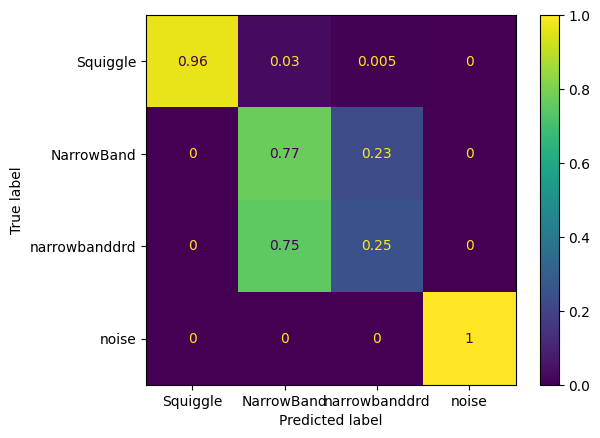

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

y_true=np.argmax(y_valid,1)
y_predict=np.argmax(model.predict(x_valid),1)

print(metrics.classification_report(y_true,y_predict))
print ("Classification Accuracy: ", metrics.accuracy_score(y_true,y_predict))

confusion_matrix(y_true,y_predict, normalize='true')

cm=confusion_matrix(y_true,y_predict, normalize='true')
#0=“squiggle”, 1=“narrowband”, 2=“narrowbanddrd”, and 3=“noise”
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Squiggle","NarrowBand","narrowbanddrd","noise"])
#cm_display.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
cm_display.plot()
plt.show()


